<a href="https://colab.research.google.com/github/DimosthenisDimoulias/datastories_for_emme/blob/main/Homework_lesson11/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SENTIMENT ANALYSIS!!

In [1]:
#!python -m spacy download el_core_news_sm

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [5]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [6]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [9]:
import spacy

In [10]:
nlp = spacy.load('el_core_news_sm')

In [12]:
skai_articles_df = pd.read_csv("/content/gdrive/MyDrive/Αντίγραφο του skai.gr-MAY23.csv")
skai_articles_df.head()

,site,url,date,section,title,author,text
0,skai.gr,https://www.skai.gr/news/world/to-vatikano-sym...,2023-05-01,Κόσμος,Το Βατικανό συμμετέχει σε ειρηνευτική αποστολή...,ΑΠΕ-ΜΠΕ,Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποσ...
1,skai.gr,https://www.skai.gr/news/world/meksiko-18-tour...,2023-05-01,Κόσμος,Μεξικό: Τουλάχιστον 18 τουρίστες νεκροί σε δυσ...,ΑΠΕ-ΜΠΕ,Τουλάχιστον δεκαοκτώ μεξικανοί τουρίστες σκοτώ...
2,skai.gr,https://www.skai.gr/news/greece/eortologio-poi...,2023-05-01,Ελλάδα,"Ποιοι γιορτάζουν σήμερα, Πρωτομαγιά",skai.gr,"Του Προφήτου Ιερεμία, του Αγίου Πανάρετου, της..."
3,skai.gr,https://www.skai.gr/news/world/soudan-i-vretan...,2023-05-01,Κόσμος,Σουδάν: Η Βρετανία ανακοίνωσε επιπλέον πτήση γ...,ΑΠΕ-ΜΠΕ,Μολονότι επισήμως η βρετανική κυβέρνηση ολοκλή...
4,skai.gr,https://www.skai.gr/news/greece/fotia-ta-ksime...,2023-05-01,Ελλάδα,Καταστράφηκε ολοσχερώς από φωτιά καφετέρια στη...,skai.gr,Υπό μερικό έλεγχο βρίσκεται πυρκαγιά που ξέσπα...


In [15]:
short_skai_articles_df = skai_articles_df[['date','text' ]]
short_skai_articles_df.head()

,date,text
0,2023-05-01,Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποσ...
1,2023-05-01,Τουλάχιστον δεκαοκτώ μεξικανοί τουρίστες σκοτώ...
2,2023-05-01,"Του Προφήτου Ιερεμία, του Αγίου Πανάρετου, της..."
3,2023-05-01,Μολονότι επισήμως η βρετανική κυβέρνηση ολοκλή...
4,2023-05-01,Υπό μερικό έλεγχο βρίσκεται πυρκαγιά που ξέσπα...


In [28]:
short_skai_articles_df.shape

(5166, 2)

In [16]:
short_skai_articles_df.dtypes

date    object
text    object
dtype: object

In [19]:
short_skai_articles_df['date'] = pd.to_datetime(short_skai_articles_df['date'], format='%Y-%m-%d')
short_skai_articles_df.dtypes

<ipython-input-19-ee7f96ecdb8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_skai_articles_df['date'] = pd.to_datetime(short_skai_articles_df['date'], format='%Y-%m-%d')


date    datetime64[ns]
text            object
dtype: object

In [20]:
short_skai_articles_df['text'] = short_skai_articles_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

<ipython-input-20-14341ea4754a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_skai_articles_df['text'] = short_skai_articles_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)


In [23]:
emolex_df['word'].head()

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
3                εχω
4               οριο
Name: word, dtype: object

In [24]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [63]:
matrix = vec.fit_transform(short_skai_articles_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [29]:
short_skai_articles_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_skai_articles_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_skai_articles_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_skai_articles_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_skai_articles_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_skai_articles_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_skai_articles_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_skai_articles_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_skai_articles_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_skai_articles_df['fear'] = wordcount_df[fear_words].sum(axis=1)

<ipython-input-29-1eb44c5d8079>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_skai_articles_df['anger'] = wordcount_df[angry_words].sum(axis=1)
<ipython-input-29-1eb44c5d8079>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_skai_articles_df['positive'] = wordcount_df[positive_words].sum(axis=1)
<ipython-input-29-1eb44c5d8079>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [30]:
short_skai_articles_df

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2023-05-01,Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποσ...,4,19,8,4,3,16,11,8,14,7
1,2023-05-01,Τουλάχιστον δεκαοκτώ μεξικανοί τουρίστες σκοτώ...,1,5,3,1,1,2,2,1,2,2
2,2023-05-01,"Του Προφήτου Ιερεμία, του Αγίου Πανάρετου, της...",0,1,0,0,0,0,0,0,0,0
3,2023-05-01,Μολονότι επισήμως η βρετανική κυβέρνηση ολοκλή...,5,9,1,1,0,8,3,2,7,8
4,2023-05-01,Υπό μερικό έλεγχο βρίσκεται πυρκαγιά που ξέσπα...,2,2,0,0,0,0,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5161,2023-05-31,"""Επιδιώκουμε φορολογική δικαιοσύνη και αντιμε...",2,11,3,3,3,10,3,2,7,1
5162,2023-05-31,Ο Γιώργος Καραγκούνης συναντήθηκε με τον παλιό...,0,0,0,0,0,0,0,0,1,0
5163,2023-05-31,Σαν σήμερα - 31 Μαΐου 2023 Ιστορικά και πολιτι...,5,17,5,1,2,7,2,3,6,5
5164,2023-05-31,Το Κυπριακό και οι ελληνοτουρκικές σχέσεις συμ...,3,10,1,3,1,9,0,2,8,3


In [31]:
short_skai_articles_df.reset_index(inplace=True)
short_skai_articles_df.set_index('date', inplace=True)
short_skai_articles_df

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,
2023-05-01,0,Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποσ...,4,19,8,4,3,16,11,8,14,7
2023-05-01,1,Τουλάχιστον δεκαοκτώ μεξικανοί τουρίστες σκοτώ...,1,5,3,1,1,2,2,1,2,2
2023-05-01,2,"Του Προφήτου Ιερεμία, του Αγίου Πανάρετου, της...",0,1,0,0,0,0,0,0,0,0
2023-05-01,3,Μολονότι επισήμως η βρετανική κυβέρνηση ολοκλή...,5,9,1,1,0,8,3,2,7,8
2023-05-01,4,Υπό μερικό έλεγχο βρίσκεται πυρκαγιά που ξέσπα...,2,2,0,0,0,0,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,5161,"""Επιδιώκουμε φορολογική δικαιοσύνη και αντιμε...",2,11,3,3,3,10,3,2,7,1
2023-05-31,5162,Ο Γιώργος Καραγκούνης συναντήθηκε με τον παλιό...,0,0,0,0,0,0,0,0,1,0
2023-05-31,5163,Σαν σήμερα - 31 Μαΐου 2023 Ιστορικά και πολιτι...,5,17,5,1,2,7,2,3,6,5


In [53]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

M.O. του αριθμού των λέξεων ανά ημέρα

<Axes: xlabel='date'>

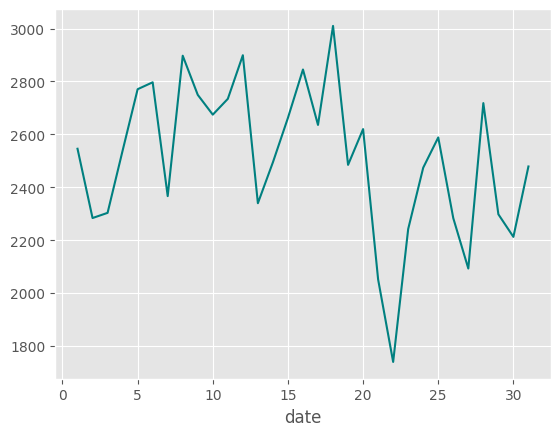

In [70]:
#Με groupb
short_skai_articles_df['text'].str.len().groupby(by=short_skai_articles_df.index.day).mean().plot(color='teal')

<Axes: xlabel='date'>

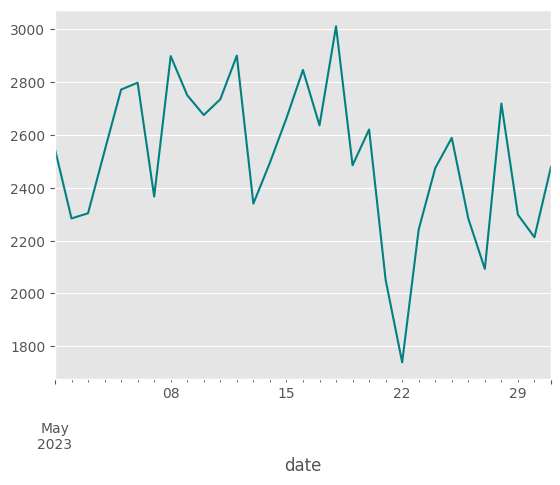

In [72]:
#Με resample()
short_skai_articles_df['text'].str.len().resample('D').mean().plot(color='teal')

Tο πλήθος των άρθρων ανά ημέρα

<Axes: ylabel='date'>

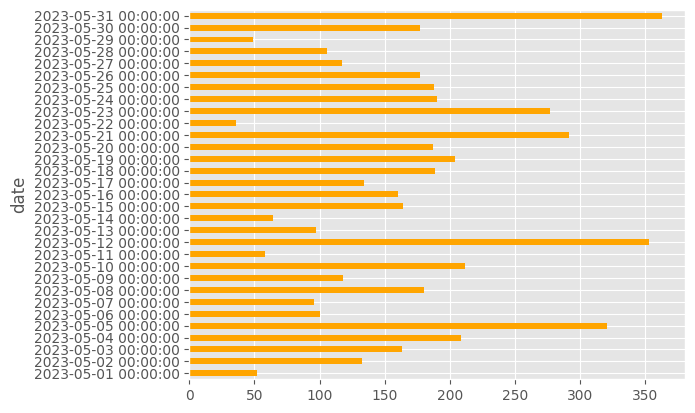

In [75]:
short_skai_articles_df['text'].resample('D').count().plot(kind='barh',color='orange')

H θετικότητα/αρνητικότητα και το συναισθηματικό πρόσιμο των άρθρων ανά ημέρα

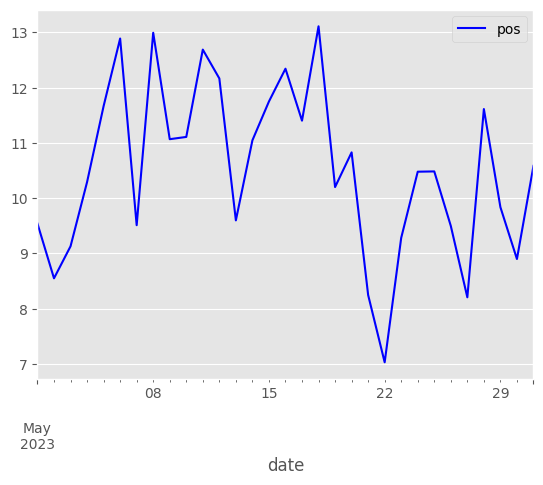

In [76]:
short_skai_articles_df['positive'].resample('D').mean().plot(color = 'b',label = 'pos').legend()

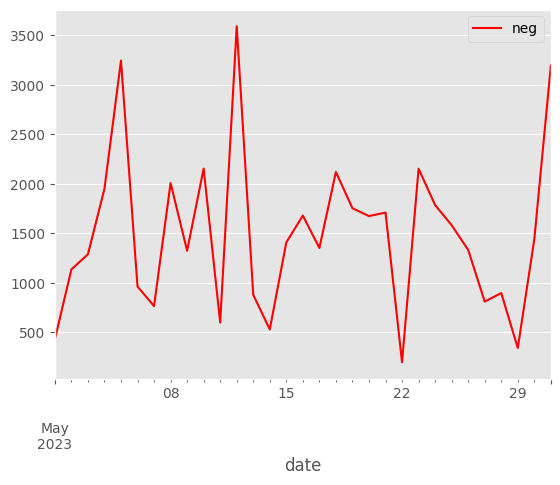

In [77]:
short_skai_articles_df['negative'].resample('D').sum().plot(color = 'r',label = 'neg').legend()

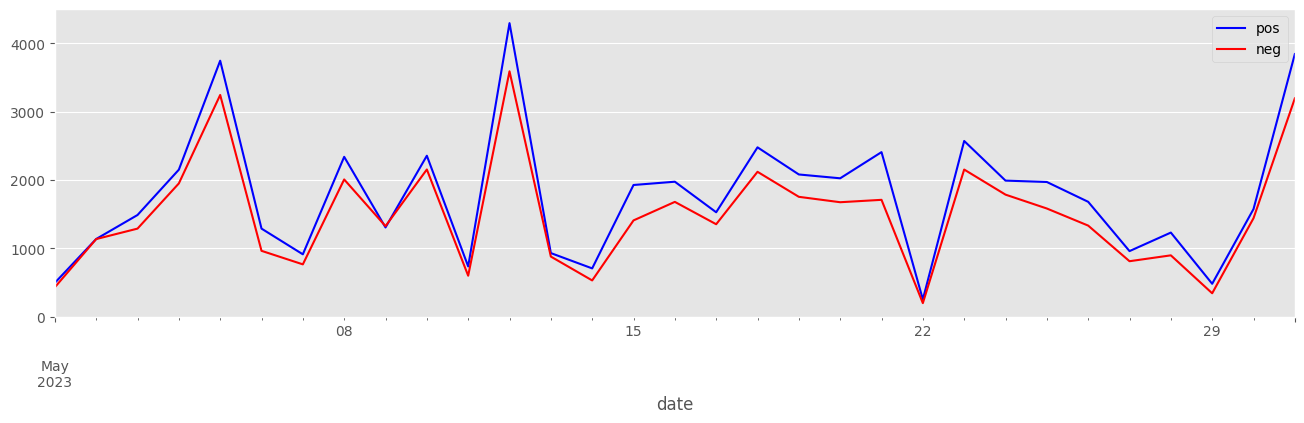

In [78]:
ax = short_skai_articles_df['positive'].resample('D').sum().plot(figsize=(16,4), color = 'b',label = 'pos')
short_skai_articles_df['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'r',label = 'neg').legend()

<Axes: xlabel='date'>

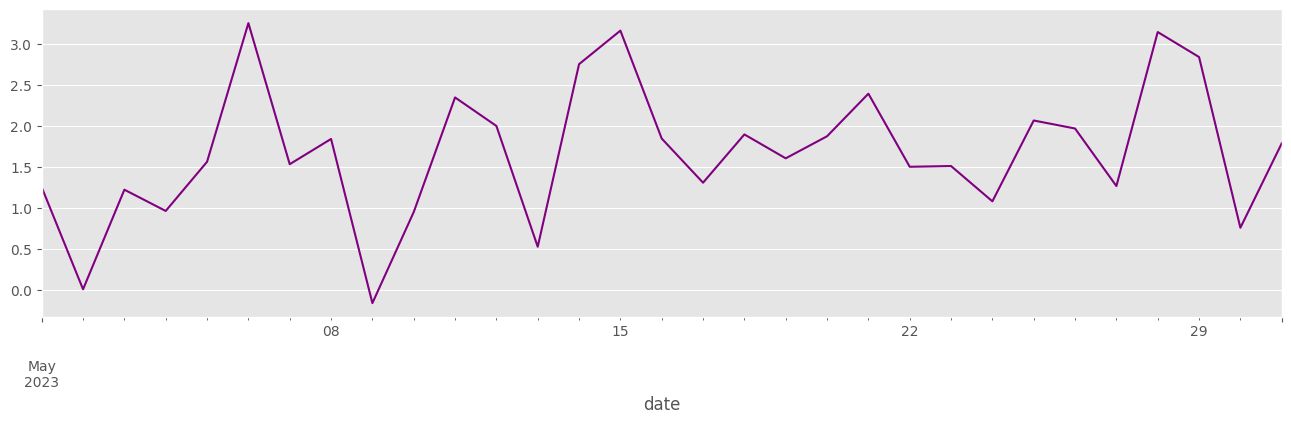

In [79]:
short_skai_articles_df['pos/neg'] = short_skai_articles_df['positive'] - short_skai_articles_df['negative']
short_skai_articles_df['pos/neg'].resample('D').mean().plot(figsize=(16,4),color='purple')

<Axes: xlabel='date'>

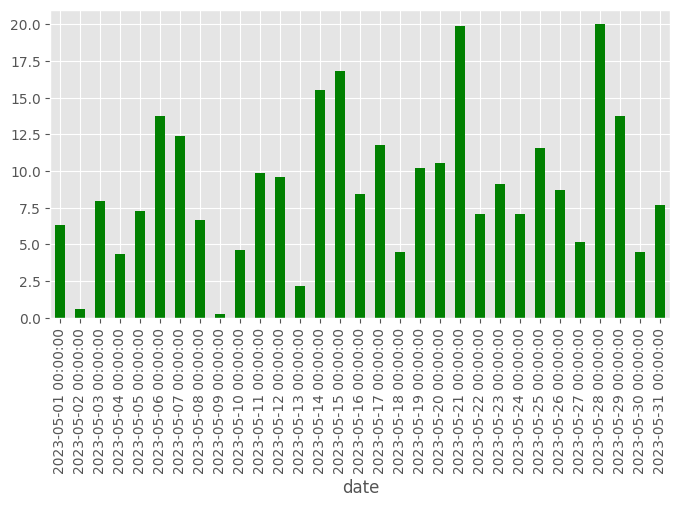

In [80]:
short_skai_articles_df['(-)αρνητικότητα | θετικότητα(+)'] = short_skai_articles_df.positive*100//short_skai_articles_df[['positive','negative']].sum(
        axis=1) - short_skai_articles_df.negative*100//short_skai_articles_df[['positive','negative']].sum(axis=1)

short_skai_articles_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_skai_articles_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

Eλπίζω να βγαίνουν έτσι επειδή δεν υπάρχει ιδιαίτερα αρνητική χροιά στα άρθρα και όχι επειδή έχω κάνει κάποιο λάθος.